In [1]:
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

#modules to find path of all sessions
import glob
import os
import numpy as np
import pickle
import platform
import math
from IPython.display import clear_output, display, HTML
from matplotlib.patches import Rectangle
from matplotlib import collections  as mc
import matplotlib.gridspec as gridspec
from scipy.ndimage.filters import gaussian_filter as smooth
import matplotlib
from __future__ import print_function
np.set_printoptions(precision=3, suppress=True)
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt



import warnings
warnings.filterwarnings('ignore')

### you might need to change the line below if you want to regenerate the figure on a differente computer 
### Below we will run some preprocessing notebooks. In our case, our preprocessing notebooks are located in 
### a folder ("load_preprocess_mouse") which is at the same level that the folder that contain the notebooks 
### that generate the figures (for instance this one)


notebookPath=os.path.dirname(os.path.realpath("__file__"))
pathToProcessingNotebooks=os.path.join(os.path.split(notebookPath)[0],"load_preprocess_mouse")
os.chdir(pathToProcessingNotebooks)   
%run loadMouse_documentation.ipynb
%run loadRawSpike_documentation.ipynb
%run plotMouse_Behavior.ipynb


#######

def has_tag(root, animal, session, tagList):
    """ Test if the session has at least one of the tag in tagList
    tag = empty file with a specific name, in a session folder
    """
    fullPath = os.path.join(root, animal, "Experiments", session)
    fileList = os.listdir(fullPath)
    for tag in tagList:
        if tag in fileList:
            return True
    return False

def cm2inch(value):
    return value/2.54
    

#Those parameters are overwritten if there is a .behav_param file
paramCarola={
    "distanceToRun":100,
    "maxTrialDuration": 60,
    "valveONTime":50,
    "minInterTrialDuration":15,
    "immobilityDuration":2,
    #to read .eeg (put None to not read .eeg)
    "nChannelElectro":32, #32
    "channel_opto": -6, #not used
    "channel_lickBreak":-5,
    "channel_reward": -4, #not used currently
    "channel_sound": -3, #not used
    "channel_trialON": -2,
    "channel_beamBreak": -1,
}    


#### root is the path to the folder where the data (MOUXXX, MOUXXY, ....ALLMOU_Analysis) are located
### you might need to change the line below depending on your computer orgnization



if platform.system()=='Linux':
    root="/data"
else:
    root="/Users/davidrobbe/Documents/Data/"
    
    
# Where to Save Files

savePath=os.path.join(root,"ALLMOU_Analysis","FigForMS")
    
print("path to data is %s"%root)
print("")
print("importing done")

path to data is /data

importing done


## Load data from illustration session 

In [2]:
if "__file__" not in dir():
    
    
    
##############################
    SESSION="MOU119_2016_03_04_18_12"
##############################


    """
    If you want to commit changes made in this NB please delete leave 1 empty line between the 2
    hashtag lines instead of your own data path
    """
    ANIMAL=SESSION[0:6]
    
    #Those parameters are overwritten if there is a .behav_param file
    paramCarola={
        "distanceToRun":100,
        "maxTrialDuration": 60,
        "valveONTime":50,
        "minInterTrialDuration":15,
        "immobilityDuration":2,
        #to read .eeg (put None to not read .eeg)
        "nChannelElectro":32, #32
        "channel_opto": -6, #not used
        "channel_lickBreak":-5,
        "channel_reward": -4, #not used currently
        "channel_sound": -3, #not used
        "channel_trialON": -2,
        "channel_beamBreak": -1,
    }
    data=Data(root,ANIMAL,SESSION,paramCarola,redoPreprocess=False)


Preprocess behavior data loaded from /data/MOU119/Experiments/MOU119_2016_03_04_18_12/Analysis/preprocesseddata_binsize250ms_.p
Spike data loaded from /data/MOU119/Experiments/MOU119_2016_03_04_18_12/Analysis/rawspikedata.p


load waveforms from /data/MOU119/Experiments/MOU119_2016_03_04_18_12/Analysis/waveforms.p


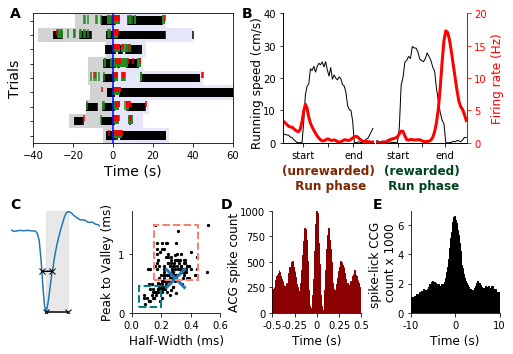

In [3]:
# A panel left. SHow spiking actvity of a given neuron

shank=3
cluster=29

plot_break_cluster(data,shank,cluster,group="Good",legend=False,lick=True,checkForDrift=True)
fig=plt.gcf()
fig.set_size_inches(cm2inch(17.6),cm2inch(12))
ax=plt.gca()
ax.set_position([0.05,0.6,0.40,0.38])
ax.set_ylim([66,57])
ax.set_xlim([-40,60])
ax.set_yticklabels([])
#ax.set_xticklabels([""] + list(range(-30,20,10)) + [""])
ax.set_title("")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Trials")


### A, right panel comparing mean firing rate between run types
binSize=0.25
colorMaps=[]
cmapNames=["Oranges","Greens"]
for cmapName in cmapNames:
    colorMaps.append(matplotlib.cm.get_cmap(cmapName))


gs2 = gridspec.GridSpec(1, 2)
gs2.update(bottom=0.6,top=0.98,left=0.55,right=0.92,wspace=0.025)


allAxesInfo=[]
allLengthInBins=[]

ax=plt.subplot(gs2[0])
outDatas=plot_normalized_running_periods_firing_rate(data, shank, cluster, binSize, runType="unrewarded")
#outDatas[0][1].get_lines()[0].set_color(colorMaps[0](1.0))
outDatas[0][1].get_lines()[0].set_linewidth(3)
outDatas[0][0].get_lines()[0].set_linewidth(1)
allAxesInfo.append(outDatas[0])
allLengthInBins.append([len(outDatas[1]),outDatas[2]])

ax=plt.subplot(gs2[1])
outDatas=plot_normalized_running_periods_firing_rate(data, shank, cluster, binSize, runType="trial good run")
#outDatas[0][1].get_lines()[0].set_color(colorMaps[1](1.0))
outDatas[0][1].get_lines()[0].set_linewidth(3)
outDatas[0][0].get_lines()[0].set_linewidth(1)
allLengthInBins.append([len(outDatas[1]),outDatas[2]])
allAxesInfo.append(outDatas[0])

plt.gcf().axes

for index,axesInfo in enumerate(allAxesInfo):
    axesInfo[1].set_title("")
    axesInfo[0].set_xlabel("")
    axesInfo[0].set_xticks([allLengthInBins[index][1],allLengthInBins[index][0]/2,allLengthInBins[index][0]-allLengthInBins[index][1]])
    axesInfo[0].set_xticklabels(["start","","end"])
    
    for curveindex,axeInfo in enumerate(axesInfo):
        axeInfo.spines['top'].set_visible(False)
        axeInfo.xaxis.set_ticks_position('bottom')
        axeInfo.tick_params(axis='x',direction='out')
        if index==0:
            axeInfo.spines['right'].set_visible(False)
            axeInfo.yaxis.set_ticks_position('left')
            if curveindex==1:
                axeInfo.set_ylabel("")
                axeInfo.set_yticks([])
            else:
                axeInfo.set_ylabel("Running speed (cm/s)",fontsize=12)
                axeInfo.yaxis.set_label_coords(-0.2,0.47)
                axeInfo.locator_params(axis='y',nbins=4)
                axeInfo.set_xlabel("(unrewarded)\n Run phase",fontsize=12,color=colorMaps[index](1.0),weight='bold')
        else:
            axeInfo.spines['left'].set_visible(False)
            
            if curveindex==0:
                axeInfo.set_ylabel("")
                axeInfo.set_yticks([])
                axeInfo.set_xlabel("(rewarded)\n Run phase",fontsize=12,color=colorMaps[index](1.0),weight='bold')
            else:
                axeInfo.yaxis.set_ticks_position('right')
                axeInfo.set_ylabel("Firing rate (Hz)",fontsize=12)
                axeInfo.locator_params(axis='y',nbins=4)
                axeInfo.tick_params(axis='y',colors='r')
                axeInfo.spines['right'].set_color("r")
                
        
        if curveindex==0:
            axeInfo.set_ylim([0,40])
        else:
            axeInfo.set_ylim([0,20])




# plot the caracteristic of the neuron, waveforme, wavefore proxy versus all neurons, ACG, CCG
gs1 = gridspec.GridSpec(1, 4)
gs1.update(bottom=0.1,top=0.4,left=0.005,right=0.985,wspace=0.5)
ax1=fig.add_subplot(gs1[0,0])
ax2=fig.add_subplot(gs1[0,1])

ax2.add_patch(Rectangle((0.05,0.1),0.15,0.355,fill=False,linestyle='--',ec='teal',lw=2))
ax2.add_patch(Rectangle((0.15,0.560),0.3,0.940,fill=False,linestyle='--',ec='salmon',lw=2))
wave,k= plot_mean_waveform(data, shank, cluster,redo=False,plotAllSpikes=True,ax1=ax1,ax2=ax2)
ax1.set_xlim([-1,1.5])
ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax1.set_xticks([])
ax1.set_yticks([])
for spine in ax1.spines:
    ax1.spines[spine].set_visible(False)
ax1.set_title("")


ax2.set_ylabel("Peak to Valley (ms)",fontsize=12)
ax2.set_xlabel("Half-Width (ms)",fontsize=12)
ax2.set_ylim([0,1.75])
ax2.set_xlim([0,0.6])
plt.locator_params(axis='y',nbins=3)
plt.locator_params(axis='x',nbins=3)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')
pos=ax2.get_position()
pos.x1=pos.x1-0.025
pos.x0=pos.x0-0.025
ax2.set_position(pos)



# acg
ax3 = fig.add_subplot(gs1[0,2])
plot_autocorrelogram(data, shank, cluster, 5, 1000)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.xaxis.set_ticks_position('bottom')
ax3.yaxis.set_ticks_position('left')
ax3.set_title("")
ax3.locator_params(axis='both',nbins=4)
ax3.get_xaxis().set_tick_params(direction='out')
ax3.set_xlabel("Time (s)",fontsize=12)
ax3.set_xlim([-500,500])
ax3.set_ylim([0,1000])
ax3.set_ylabel("ACG spike count",fontsize=12)
ax3.set_xticklabels([-0.5,-0.25,0,0.25,0.5])
ax3.yaxis.set_label_coords(-0.35,0.5)
pos=ax3.get_position()
pos.x1=pos.x1-0.01
pos.x0=pos.x0-0.01
ax3.set_position(pos)




            
####CCG

# gs3 = gridspec.GridSpec(1, 1)
# gs3.update(bottom=0.25,top=0.45,left=0.74,right=0.98)
ax=plt.subplot(gs1[3])        
binSize=0.25
half_width_ms=10000
clu, cluBreak = plot_crosscorrelogram_behaviour(data, shank, cluster, behaviorType="lick", bin_ms=200, half_width_ms=half_width_ms,plotCCGAndACG=False)
ax.set_xlim([-half_width_ms,half_width_ms])
ax.tick_params(axis='x',direction='out')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.locator_params(axis='y',nbins=4)
ax.set_xlabel("Time (s)",fontsize=12)
ax.set_ylabel("spike-lick CCG \n count x 1000 ",fontsize=12)
ax.set_xticklabels(list(range(-10,15,10)))      
ax.set_yticklabels(list(range(0,10,2))) 
ax.yaxis.set_label_coords(-0.15,0.5)


figuresLabels={"A":[0.025,0.96],"B":[0.49,0.96],"C":[0.025,0.4],"D":[0.45,0.4],"E":[0.75,0.4]}
for label,coordinates in sorted(figuresLabels.items()):
    fig.text(coordinates[0],coordinates[1],label,figure=fig,weight='bold',fontsize=14,ha='right' ,va='bottom')

saveFullName=os.path.join(savePath,'RevisedFig06_WhiskingCell.pdf')
plt.savefig(saveFullName,orientation='landscape',dpi=600,format='pdf') 

**Figure 6. Licking can powerfully modulate spiking activity at the end of the runs. A)**  Behavioral activity during a few trials of a recording session (black and green ticks indicate wheel movements and licks, respectively) and spiking activity (red ticks) of a neuron that fire at the end of the runs. **B)**, Mean firing rate during unrewarded (left) and rewarded (right) runs. **C)**  Mean spike waveform and waveform features (right, blue cross) superimposed on all recorded neurons waveform markers (black dots, dashed squares indicate classical limits used to distinguish putative FSI (teal) and PN (salmon)). **D)**  Auto-correlogram of spiking  activity. **E)** Cross-correlogram between spiking and licking activity. Data in B-E are from the same cell. 